In [1]:
import requests
import json
import datetime as dt
import pandas as pd
import time
import urllib
import re
import sqlite3

In [3]:
#Get a list of stations of daily GHCN data
station_name_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
station_name = urllib.request.urlopen(station_name_url).readlines()

In [5]:
#Extract only information we use and make a list.
station_name_short=[]

for line in station_name:
    #strip extra information
    line = line[:-14]
    line = line.decode('UTF-8')
    
    #split ID, lat, long, and elevation
    line1 = line[0:37]
    line1 = re.split(' +', line1)
    
    #split state place NaN if no information
    line2 = line[37:40]
    if line2.strip() == '':
        line2 = 'NaN'
    else:
        line2 = line2.strip()
    
    #split station name
    line3 = line[40:]
    line3 = line3.strip()
    
    #conbine all in one line
    line1.append(line2)
    line1.append(line3)
    
    station_name_short.append(line1)

#Show the first 10 items in the list
station_name_short[:10]

[['ACW00011604',
  '17.1167',
  '-61.7833',
  '10.1',
  'NaN',
  'ST JOHNS COOLIDGE FLD'],
 ['ACW00011647', '17.1333', '-61.7833', '19.2', 'NaN', 'ST JOHNS'],
 ['AE000041196', '25.3330', '55.5170', '34.0', 'NaN', 'SHARJAH INTER. AIRP'],
 ['AEM00041194', '25.2550', '55.3640', '10.4', 'NaN', 'DUBAI INTL'],
 ['AEM00041217', '24.4330', '54.6510', '26.8', 'NaN', 'ABU DHABI INTL'],
 ['AEM00041218', '24.2620', '55.6090', '264.9', 'NaN', 'AL AIN INTL'],
 ['AF000040930', '35.3170', '69.0170', '3366.0', 'NaN', 'NORTH-SALANG'],
 ['AFM00040938', '34.2100', '62.2280', '977.2', 'NaN', 'HERAT'],
 ['AFM00040948', '34.5660', '69.2120', '1791.3', 'NaN', 'KABUL INTL'],
 ['AFM00040990', '31.5000', '65.8500', '1010.0', 'NaN', 'KANDAHAR AIRPORT']]

In [6]:
#make dataframe for the list of stations
df_station_name = pd.DataFrame(station_name_short, columns=['Station ID', 'latitude', 'longitude', 'elevation', 'state', 'station name'])
df_station_name.head()

,Station ID,latitude,longitude,elevation,state,station name
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL


In [7]:
df_station_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113933 entries, 0 to 113932
Data columns (total 6 columns):
Station ID      113933 non-null object
latitude        113933 non-null object
longitude       113933 non-null object
elevation       113933 non-null object
state           113933 non-null object
station name    113933 non-null object
dtypes: object(6)
memory usage: 5.2+ MB


In [8]:
#Get information of which type of data and which periond is avaliable for each stations.
station_type_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt'
station_type = urllib.request.urlopen(station_type_url).readlines()

In [9]:
#Extract information we use only.
station_type_list=[]

for line in station_type:
    #decode and remove '\n' 
    line = line.decode('UTF-8')
    line = line[:-1]
    
    #split by space
    line = re.split(' +', line)
    
    station_type_list.append(line)

#Show the first 10 items.
station_type_list[:10]

[['ACW00011604', '17.1167', '-61.7833', 'TMAX', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'TMIN', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'PRCP', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'SNOW', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'SNWD', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'PGTM', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WDFG', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WSFG', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WT03', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WT08', '1949', '1949']]

In [10]:
#make datafram of a list of available datatype and period for each stations
df_station_type = pd.DataFrame(station_type_list, columns = ['Station ID', 'latitude', 'longitude', 'element type', 'begin year', 'end year'])
df_station_type.head()

,Station ID,latitude,longitude,element type,begin year,end year
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949


In [11]:
df_station_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680787 entries, 0 to 680786
Data columns (total 6 columns):
Station ID      680787 non-null object
latitude        680787 non-null object
longitude       680787 non-null object
element type    680787 non-null object
begin year      680787 non-null object
end year        680787 non-null object
dtypes: object(6)
memory usage: 31.2+ MB


In [12]:
#Change 'begin year' and 'end year' to numeric.
df_station_type['begin year'] = pd.to_numeric(df_station_type['begin year'])
df_station_type['end year'] = pd.to_numeric(df_station_type['end year'])

In [13]:
#Merge two dataframes, a list of stations and avaliable datatype and period for each stations
df_station = pd.merge(df_station_name, df_station_type, on = 'Station ID', how = 'inner')
df_station.head()

,Station ID,latitude_x,longitude_x,elevation,state,station name,latitude_y,longitude_y,element type,begin year,end year
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNWD,1949,1949


In [14]:
#Save data of station to CSV file
df_station.to_csv('noaa_station.csv')

In [14]:
df_station = pd.read_csv('noaa_station.csv')
df_station.head()

,Unnamed: 0,Station ID,latitude_x,longitude_x,elevation,state,station name,latitude_y,longitude_y,element type,begin year,end year
0,0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMAX,1949,1949
1,1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMIN,1949,1949
2,2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,PRCP,1949,1949
3,3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNOW,1949,1949
4,4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNWD,1949,1949


In [15]:
#Extract stations which has data of max temperature, min temperature, perception, with period of 1990 to 2019
df_station_selected = df_station[(df_station['begin year']<1990)&
                                (df_station['end year']==2019)&
                                (df_station['element type']=='TMAX')|
                                (df_station['element type']=='TMIN')|
                                (df_station['element type']=='PRCP')]
df_station_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160574 entries, 1 to 680722
Data columns (total 12 columns):
Unnamed: 0      160574 non-null int64
Station ID      160574 non-null object
latitude_x      160574 non-null float64
longitude_x     160574 non-null float64
elevation       160574 non-null float64
state           99118 non-null object
station name    160574 non-null object
latitude_y      160574 non-null float64
longitude_y     160574 non-null float64
element type    160574 non-null object
begin year      160574 non-null int64
end year        160574 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 15.9+ MB


In [16]:
#Extract stations which has all three data, TMAX, TMIN, and PRCP, and make a list
df_groupby = df_station_selected.groupby('Station ID')
element_count = df_groupby['element type'].count()
station_with_three = element_count[element_count==3].index.tolist()

#Show the first 10 items.
station_with_three[:10]

['AE000041196',
 'AEM00041194',
 'AEM00041217',
 'AFM00040938',
 'AFM00040948',
 'AFM00040990',
 'AG000060390',
 'AG000060590',
 'AG000060611',
 'AGE00147708']

In [22]:
#Make dataframe of stations which has all three data since before 1990
df_station_selected = df_station_selected[df_station_selected['Station ID'].isin(station_with_three)]
df_station_selected.to_csv('noaa_station_selected.csv')

In [17]:
#Save the data frame to csv
df_station_selected = pd.read_csv('noaa_station_selected.csv')

In [19]:
#Soybean state is where 95% of soybean is planted in the US
soybean_state = ['AR','IL','IN','IA','KS','KY','LA','MI','MN','MS','MO','NE','NC','ND','OH','SD','TN','WI']

#Show how many stations are avaliable for each state
total = 0
for state in soybean_state:
    number = len(df_station_selected[df_station_selected.state==state])
    total+=number
    print(state, number)

#Show total number of stations
print('total number: ', total)

AR 1150
IL 2140
IN 1929
IA 1199
KS 2331
KY 1133
LA 1023
MI 1838
MN 1706
MS 865
MO 1869
NE 2521
NC 2557
ND 819
OH 1456
SD 1365
TN 1805
WI 1382
total number:  29088


In [25]:
#Select TMAX only
df_station_selected_tmax = df_station_selected[df_station_selected['element type']=='TMAX']

In [26]:
#randomly select 5 stations from each state and make a dataframe of sampled stations. 
df_station_sample=pd.DataFrame()
for state in soybean_state:
    df_element = df_station_selected_tmax[df_station_selected_tmax.state==state].sample(n=5)
    df_station_sample = pd.concat([df_station_sample, df_element])

#Save sampled stations to csv.
df_station_sample.to_csv('noaa_station_sample.csv')

In [20]:
df_station_sample = pd.read_csv('noaa_station_sample.csv')

In [7]:
#Make a list of stations which randomly selected
sample_station = df_station_sample['Station ID'].tolist()

In [8]:
#Get API token to connect to NOAA API
with open('api_token.json') as key_file:
    api_token = json.load(key_file)
mytoken = api_token['noaa_token']

In [10]:
#Make a function which get json data from NOAA API from certain period from a station.
#By API regulation, we can get only 1000 data for each call and 10,000 call a day.
def get_dairy_summury(begin_date, end_date, station):
        
    stationid = 'GHCND:'+station #set station id
    datasetid = 'GHCND' #datset id for "Daily Summaries"
    datatypeid1 = 'PRCP' #perception
    datatypeid2 = 'TMAX' #max tempurture
    datatypeid3 = 'TMIN' #max tempurture

    #Set API token
    token = {'token' : mytoken}

    params = 'datasetid='+str(datasetid)+'&'+'datatypeid='+str(datatypeid1)+'&'+'datatypeid='+str(datatypeid2)+'&'+'datatypeid='+str(datatypeid3)+'&'+'stationid='+str(stationid)+'&'+'startdate='+str(begin_date)+'&'+'enddate='+str(end_date)+'&'+'limit=1000'+'&'+'units=standard'

    url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'
    
    #get data from API
    r = requests.get(url, params=params, headers=token)
    
    #make data json format.
    data = r.json()
    
    return data
 

In [18]:
#Connect to a data base
#conn = sqlite3.connect('weather.db')
#c = conn.cursor()

#DO NOT excute below if you want to continuously collecting data
#c.execute('''DROP TABLE IF EXISTS users''')
#c.execute('''CREATE TABLE IF NOT EXISTS users (date, datatype, station, attributes, value)''')

#indicator of progress(count one for each stations)
m=0

#Get data for each stations,
for station in sample_station[74:]:
    
    # connect to database
    conn = sqlite3.connect('weather.db')
    c = conn.cursor()
    
    #set start date as 1990 Jan 1st and get date of today
    start_date = dt.datetime.strptime('1990-01-01', '%Y-%m-%d')
    today = dt.datetime.today()
    
    #sleep to avoid too much access for API
    time.sleep(10)
    
    #set true false indicator
    k=0
    
    #count one for each staion and show progress
    m=m+1
    print(m)
    
    #continue roope until start date become today
    while k==0:
        
        #set end date as start date + 332days since we can get only 1,000data at one call to API
        #for each day, we get three data of TMAX, TMIN, and PRCP.
        if start_date + dt.timedelta(days=332) < today:
            end_date = start_date + dt.timedelta(days=332)
        
        else:
            end_date = today - dt.timedelta(days=1)
            k=1
        
        #convert timdelta to string
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')
        
        #get data via API. Break from roop if no data was got.
        data = get_dairy_summury(start_date, end_date, station)
        if data == {}:
            print('Data is missing!! station ID {}'.format(station))
            missing_station.append(station)
            break
            
        else:
            data = data['results']
        
        #write data into sql database
        for val in data:
            c.execute('''INSERT INTO users VALUES (?, ?, ?, ?, ?);''', (val['date'], val['datatype'], val['station'], val['attributes'], val['value']))
    
        #set start date as end date +1day, at final roope start date become today
        end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
        start_date = end_date + dt.timedelta(days=1)
        
        time.sleep(0.2)
    
    
    # Commit the incerts
    conn.commit()

    # close database
    conn.close()
    

1
2
Data is missing!! station ID USC00391392
3
4
5
6
7
8
Data is missing!! station ID USC00408184
9
10
Data is missing!! station ID USC00402680
11
12
13
14
15
Data is missing!! station ID USC00475573
16


In [23]:
#record station which data is missing
missing_station = ['USC00034572', 'USC00124356', 'USC00138693', 'USW00093909', 'USC00142881', 'USC00157677', 
                  'USC00154208', 'USW00012884', 'USC00203504', 'USC00218311', 'USC00238603', 'USC00250070',
                   'USC00322482', 'USC00327585', 'USC00334681', 'USC00391392', 'USC00408184', 'USC00402680',
                   'USC00475573']

In [24]:
len(missing_station)

19

In [20]:
#Make dataframe of data for sampled stations
conn = sqlite3.connect('weather.db')
sql = '''SELECT date, datatype, station, attributes, value FROM users'''
df = pd.read_sql(sql, conn)
df.head()

,date,datatype,station,attributes,value
0,1990-01-01T00:00:00,PRCP,GHCND:USC00035186,",,0,0800",0.0
1,1990-01-01T00:00:00,TMAX,GHCND:USC00035186,",,0,0800",44.0
2,1990-01-01T00:00:00,TMIN,GHCND:USC00035186,",,0,0800",31.0
3,1990-01-02T00:00:00,PRCP,GHCND:USC00035186,",,0,0800",0.0
4,1990-01-02T00:00:00,TMAX,GHCND:USC00035186,",,0,0800",44.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433048 entries, 0 to 2433047
Data columns (total 5 columns):
date          object
datatype      object
station       object
attributes    object
value         float64
dtypes: float64(1), object(4)
memory usage: 92.8+ MB


In [22]:
#Show number of data for each stations.
i=-1
for item in sample_station:
    station = 'GHCND:'+item
    number = len(df[df.station==station])
    i+=1
    if item in missing_station:
        m='missing'
    else:
        m=''
    print(i, item, number, m)

0 USC00035186 32180 
1 USC00034756 32224 
2 USC00032978 31606 
3 USC00033466 31812 
4 USC00034572 0 missing
5 USW00014806 32126 
6 USC00111302 31457 
7 USC00116200 31559 
8 USC00118916 30553 
9 USC00118293 32257 
10 USC00128698 31232 
11 USW00014848 32412 
12 USC00124356 23268 missing
13 USC00127298 31099 
14 USC00126435 29730 
15 USW00014943 32415 
16 USW00014933 32412 
17 USC00135131 31566 
18 USC00138693 3489 missing
19 USC00136327 30119 
20 USW00093909 0 missing
21 USC00142881 0 missing
22 USC00142432 32276 
23 USC00143239 30327 
24 USC00144857 28696 
25 USC00150254 29233 
26 USC00155694 32014 
27 USC00157677 23451 missing
28 USC00154208 519 missing
29 USC00155067 31581 
30 USW00003937 32415 
31 USW00012930 29834 
32 USW00012916 32414 
33 USC00168163 31378 
34 USW00012884 0 missing
35 USC00202250 32112 
36 USC00203744 31371 
37 USC00203504 16309 missing
38 USW00014822 27259 
39 USC00208800 32384 
40 USC00212842 30781 
41 USC00210252 32310 
42 USC00218311 20343 missing
43 USW0001492

In [26]:
#Show result in histogram
%matplotlib inline
import matplotlib.pyplot as plt

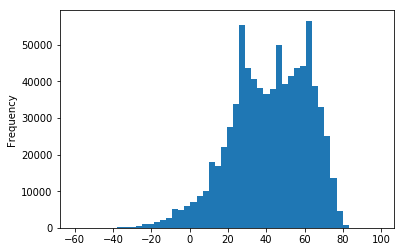

In [38]:
#histogram for maximum temperature of sampled stations
df[df.datatype == 'TMIN'].value.plot(kind='hist', bins=50)

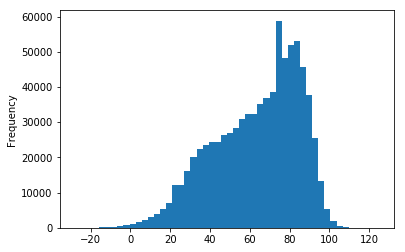

In [33]:
#histogram for minimum temperature of sampled stations
df[df.datatype == 'TMAX'].value.plot(kind='hist', bins=50)

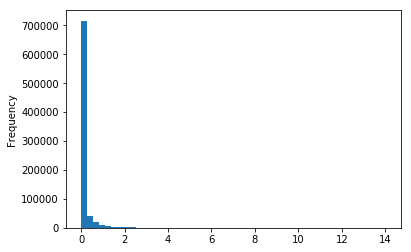

In [35]:
#histogram for perception of sampled stations
df[df.datatype == 'PRCP'].value.plot(kind='hist', bins=50)